# Cencus Adult Income
Zaki Syaiful Hunafa

RMT-018

## 1. Descriptive

### Objective

The objective of this analysis is to predict whether an individual's income exceeds $50,000 per year or not, based on the demographic and employment-related attributes provided in the Census Adult Income dataset. The analysis will be conducted using logistic regression and support vector machines (SVM) in order to determine the most accurate model for predicting income level. The analysis will use two models - logistic regression and SVM - to predict income level based on demographic and employment-related attributes. Model performance will be evaluated using accuracy, precision, recall, and F1 score. Using data that queried from Big Query as follows:

`SELECT age, workclass, education, education_num, marital_status, occupation, relationship, race, sex, capital_gain, capital_loss, hours_per_week, native_country, income_bracket
FROM bigquery-public-data.ml_datasets.census_adult_income
WHERE workclass != ' ?' 
AND hours_per_week < 100 
LIMIT 35928`

The analysis will use the Census Adult Income dataset, which provides extensive demographic and employment-related information about individuals. Logistic regression and SVM are well-established machine learning models that are commonly used for binary classification tasks. Predicting income level is a crucial task for individuals, organizations, and governments alike. By accurately predicting income level based on demographic and employment-related attributes, this analysis can help identify key factors that affect income level and improve decision-making around issues such as poverty reduction and social mobility. The analysis will be completed within a reasonable time frame, with a focus on ensuring that results are accurate and robust. The timeline will include data preprocessing, EDA, model training and evaluation, and final reporting of results.

In summary, this analysis will use SMART methodologies to predict income level based on demographic and employment-related attributes in the Census Adult Income dataset. By using well-established machine learning models and evaluating model performance using multiple metrics, the analysis will provide valuable insights into the key factors that affect income level and identify the most accurate model for predicting income level.

### Conceptual Problems

1. In logistic regression, the coefficients represent the relationship between each feature (independent variable) and the logarithm of the odds ratio for the dependent variable. These coefficients, also known as beta coefficients, are used to calculate the predicted probability of the outcome (e.g., a binary classification of yes or no) based on the values of the independent variables.

    The coefficient values are estimated using a process called maximum likelihood estimation, which aims to find the values that best fit the data and maximize the likelihood of observing the data given the model. The coefficients are often presented along with their corresponding standard errors, confidence intervals, and p-values, which provide information about the uncertainty and statistical significance of the estimates.

    Interpreting the coefficient values can be challenging, as they represent the change in the log-odds of the outcome for a unit change in the corresponding independent variable, holding all other variables constant. However, exponentiating the coefficient values (i.e., taking the exponential function) yields the odds ratio, which represents the factor by which the odds of the outcome increase for a unit increase in the independent variable. This can provide a more intuitive interpretation of the coefficient values and help identify the most important predictors of the outcome.

2. In Support Vector Machines (SVM), the term "support vector" refers to the data points that lie closest to the decision boundary (or hyperplane) that separates the different classes in a binary classification problem. The support vectors are the key elements of the SVM algorithm, as they define the margin (or the distance between the hyperplane and the closest data points) and the decision boundary.

    The goal of the SVM algorithm is to find the hyperplane that maximizes the margin between the two classes, while minimizing the classification error. The support vectors are the data points that lie on the margin or are misclassified, and they determine the position and orientation of the hyperplane.

    During the training phase of the SVM algorithm, the support vectors are identified by solving a quadratic optimization problem, which involves minimizing the classification error subject to the constraint that the margin is maximized. The support vectors are the data points that lie on the boundary of the margin, and they are the only data points that affect the position and orientation of the hyperplane.

    The use of support vectors in SVM has several advantages, including:

    * SVM can handle high-dimensional data with relatively few support vectors, which makes it computationally efficient and suitable for large datasets.
    * SVM is robust to outliers, as the support vectors are only affected by the data points that lie closest to the decision boundary.
    * SVM can model complex nonlinear decision boundaries by using kernel functions, which transform the data into a higher-dimensional space where the data becomes linearly separable. In this transformed space, the support vectors define the position and orientation of the hyperplane.   

3. In Support Vector Machines (SVM), the kernel parameter specifies the type of kernel function used to transform the input data into a higher-dimensional space where the data becomes linearly separable. The kernel function calculates the similarity (or distance) between pairs of input data points in the transformed space, which is used to construct the decision boundary (or hyperplane) that separates the different classes in a binary classification problem.

    - Linear Kernel = This is the most basic type of kernel. It is used to solve classification problem as well as the fastest.

    - Polinomial Kernel = Similiar with linear kernel, this kernel has a higher dimension which is represented by parameter `d`. This parameter is also polinomial degress

    - Gaussian Radian Basis Function (rbf) = Is used for non-linear data

    - Sigmoid Kernel = Is used for neural network

## 2. Import Libraries

In [454]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# to generate correlation for categoty and numerical features
from dython.nominal import associations

# Google cloud setting
from google.cloud import bigquery
from google.oauth2 import service_account

# To Encode Categorical Column
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

# To Scalling Numerical Column
from sklearn.preprocessing import MinMaxScaler

# For Logistic Regression
from sklearn.linear_model import LogisticRegression

# Split Dataset and Standarize the Datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay, confusion_matrix, classification_report, mean_absolute_error

# SVM
from sklearn.svm import SVC

# Save data
import pickle
import json


credentials = service_account.Credentials.from_service_account_file('harvest-moon-370515-745ab715b948.json')
project_id = "harvest-moon-370515" 
client = bigquery.Client(credentials=credentials, project=project_id)

## 3. Query SQL

In [455]:
# Generate data
df = client.query('''
SELECT age, workclass, education, education_num, marital_status, occupation, relationship, race, sex, capital_gain, capital_loss, hours_per_week, native_country, income_bracket
FROM bigquery-public-data.ml_datasets.census_adult_income
WHERE workclass != ' ?' 
  AND hours_per_week < 100 
LIMIT 35928
''').to_dataframe()

# save csv
df.to_csv('h8dsft_P1G2_zaki.csv')
df.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,39,Private,9th,5,Married-civ-spouse,Other-service,Wife,Black,Female,3411,0,34,United-States,<=50K
1,77,Private,9th,5,Married-civ-spouse,Priv-house-serv,Wife,Black,Female,0,0,10,United-States,<=50K
2,38,Private,9th,5,Married-civ-spouse,Other-service,Wife,Black,Female,0,0,24,Haiti,<=50K
3,28,Private,9th,5,Married-civ-spouse,Protective-serv,Wife,Black,Female,0,0,40,United-States,<=50K
4,37,Private,9th,5,Married-civ-spouse,Machine-op-inspct,Wife,Black,Female,0,0,48,United-States,<=50K


From the above dataset, here is the description of each column:

Name | Definition
---|---
`age` | Age of person
`workclass` | Nature of employment
`education` | Level of education completed
`education_num` | Estimated years of education completed based on the value of the education field
`marital_status` | Marital status
`occupation` | Occupation category
`relationship` | Relationship to the household
`race` | Race
`sex` | Gender
`capital_gain` | Amount of capital gains
`capital_loss` | Amount of capital loss
`native_country` | Country of birth
`income_bracket` | Either ">50K" or "<=50K" based on income in dollar yearly

## 4. Data Loading

In [456]:
# first 10 rows on df
df.head(10)

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,39,Private,9th,5,Married-civ-spouse,Other-service,Wife,Black,Female,3411,0,34,United-States,<=50K
1,77,Private,9th,5,Married-civ-spouse,Priv-house-serv,Wife,Black,Female,0,0,10,United-States,<=50K
2,38,Private,9th,5,Married-civ-spouse,Other-service,Wife,Black,Female,0,0,24,Haiti,<=50K
3,28,Private,9th,5,Married-civ-spouse,Protective-serv,Wife,Black,Female,0,0,40,United-States,<=50K
4,37,Private,9th,5,Married-civ-spouse,Machine-op-inspct,Wife,Black,Female,0,0,48,United-States,<=50K
5,45,Private,9th,5,Married-civ-spouse,Machine-op-inspct,Wife,White,Female,0,0,40,United-States,>50K
6,55,Private,9th,5,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,23,United-States,<=50K
7,27,Private,9th,5,Married-civ-spouse,Machine-op-inspct,Wife,White,Female,0,0,37,Portugal,<=50K
8,31,Private,9th,5,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
9,30,Private,9th,5,Married-civ-spouse,Machine-op-inspct,Wife,White,Female,0,0,40,Portugal,<=50K


In [457]:
# 10 last rows on df
df.tail(10)

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
30715,23,Private,Some-college,10,Never-married,Adm-clerical,Other-relative,Asian-Pac-Islander,Female,0,0,24,Vietnam,<=50K
30716,22,Private,Some-college,10,Never-married,Tech-support,Other-relative,Asian-Pac-Islander,Female,0,0,32,United-States,<=50K
30717,25,Private,Some-college,10,Never-married,Craft-repair,Other-relative,Asian-Pac-Islander,Female,0,0,40,Cambodia,<=50K
30718,22,Private,Some-college,10,Never-married,Craft-repair,Other-relative,Asian-Pac-Islander,Female,0,0,40,Vietnam,<=50K
30719,48,Private,Some-college,10,Married-civ-spouse,Craft-repair,Other-relative,Asian-Pac-Islander,Male,0,0,40,Cambodia,>50K
30720,46,Private,Some-college,10,Married-civ-spouse,Craft-repair,Other-relative,Asian-Pac-Islander,Male,0,0,40,India,<=50K
30721,45,Private,Some-college,10,Married-civ-spouse,Craft-repair,Other-relative,Asian-Pac-Islander,Male,0,0,40,Philippines,<=50K
30722,32,Private,Some-college,10,Married-civ-spouse,Sales,Other-relative,Asian-Pac-Islander,Female,0,0,40,Greece,<=50K
30723,30,Self-emp-not-inc,Some-college,10,Never-married,Sales,Other-relative,Asian-Pac-Islander,Male,0,2258,40,South,<=50K
30724,20,Self-emp-not-inc,Some-college,10,Never-married,Prof-specialty,Other-relative,Asian-Pac-Islander,Female,0,0,20,South,<=50K


In [458]:
df.occupation.unique()

array([' Other-service', ' Priv-house-serv', ' Protective-serv',
       ' Machine-op-inspct', ' Tech-support', ' Exec-managerial',
       ' Farming-fishing', ' Adm-clerical', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Handlers-cleaners', ' Prof-specialty', ' ?',
       ' Armed-Forces'], dtype=object)

In [459]:
df[
    (df['capital_gain'] == 0) &
    (df['capital_loss'] != 0) &
    (df['income_bracket'] == '>50K')
]

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket


In [460]:
# delete whitespace in df
cols = df.columns[df.dtypes == 'O']
df[cols] = df[cols].apply(lambda x: x.str.strip())

In [461]:
df.occupation.unique()

array(['Other-service', 'Priv-house-serv', 'Protective-serv',
       'Machine-op-inspct', 'Tech-support', 'Exec-managerial',
       'Farming-fishing', 'Adm-clerical', 'Sales', 'Craft-repair',
       'Transport-moving', 'Handlers-cleaners', 'Prof-specialty', '?',
       'Armed-Forces'], dtype=object)

We will drop rows with value `0` in their `capital_gain` AND `capital_loss`

In [462]:
df.shape

(30725, 14)

In [463]:
# drop rows with value 0 in both capital_gain and capital_loss
df = df[(df['capital_gain'] != 0) | (df['capital_loss'] != 0)]
df.shape

(4050, 14)

In [464]:
# df after drop anomaly data
df.shape

(4050, 14)

In [465]:
# analyze cardinality
features = df.columns.to_list()
for col in features:
    p = df[col].value_counts(normalize=True)*100

    print(col)
    print()
    print(p)
    print('-'*40)

age

39    3.851852
46    3.555556
41    3.358025
42    3.234568
36    3.185185
        ...   
79    0.074074
83    0.049383
76    0.049383
80    0.049383
82    0.024691
Name: age, Length: 68, dtype: Float64
----------------------------------------
workclass

Private             67.012346
Self-emp-not-inc    10.197531
Local-gov            7.925926
Self-emp-inc         7.012346
State-gov            4.049383
Federal-gov          3.753086
Without-pay          0.049383
Name: workclass, dtype: float64
----------------------------------------
education

HS-grad         25.407407
Bachelors       23.333333
Some-college    17.802469
Masters         10.246914
Prof-school      5.135802
Assoc-voc        4.419753
Assoc-acdm       3.308642
Doctorate        3.086420
11th             1.950617
10th             1.481481
7th-8th          1.432099
9th              0.839506
12th             0.666667
5th-6th          0.592593
1st-4th          0.197531
Preschool        0.098765
Name: education, dtype: float6

There is still `?` values in some of the columns which will be dropped. The collumns are in follows:
 * ccupancy: 0.02 %
 * native_country: 1.8 %
 

In [466]:
# Drop value '?'
df = df[df != '?']

In [467]:
# Check NaN values in each columns
df.isnull().sum()

age                0
workclass          0
education          0
education_num      0
marital_status     0
occupation         0
relationship       0
race               0
sex                0
capital_gain       0
capital_loss       0
hours_per_week     0
native_country    85
income_bracket     0
dtype: int64

In [468]:
# drop NaN values in native_country
df.dropna(subset=['native_country'], inplace=True)

In [469]:
# Get percentage of 0 values in each column
for col in df.columns:
    zero_count = df[df[col] == 0].shape[0]
    total_count = df.shape[0]
    print(f"{col}: {zero_count/total_count*100:.2f}%")

age: 0.00%
workclass: 0.00%
education: 0.00%
education_num: 0.00%
marital_status: 0.00%
occupation: 0.00%
relationship: 0.00%
race: 0.00%
sex: 0.00%
capital_gain: 35.99%
capital_loss: 64.01%
hours_per_week: 0.00%
native_country: 0.00%
income_bracket: 0.00%


## 5. Exploratory Data Analysis (EDA)

I will change value in income_bracket:
 - 0 for <= 50K
 - 1 for > 50K

In [470]:
df['income_bracket'] = df['income_bracket'].apply(lambda x: 0 if x == '<=50K' else 1)

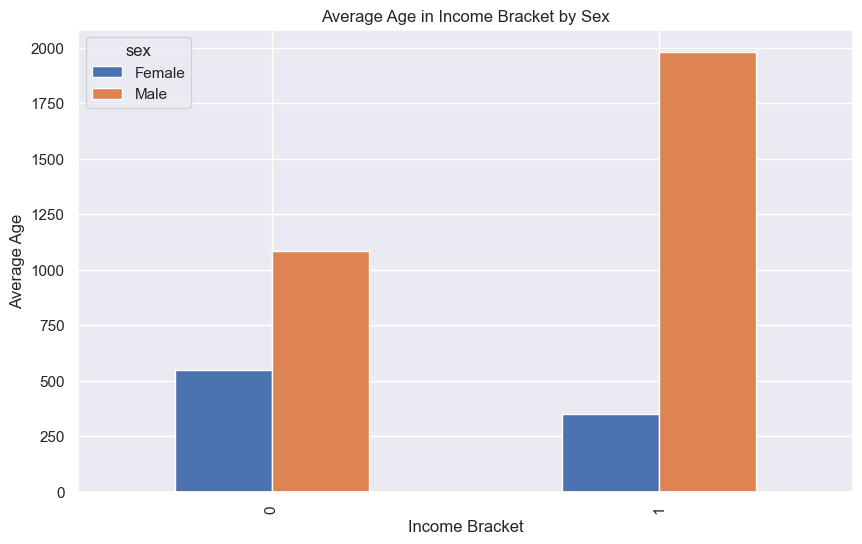

In [471]:
# Create a barplot of average age in income bracket with hue=sex
df.groupby(['income_bracket', 'sex'])['age'].count().unstack().plot(kind='bar', figsize=(10,6))
plt.title('Average Age in Income Bracket by Sex')
plt.xlabel('Income Bracket')
plt.ylabel('Average Age')
plt.show()

In [472]:
df.groupby(['marital_status', 'income_bracket'])['income_bracket'].count()

marital_status         income_bracket
Divorced               0                  281
                       1                  155
Married-AF-spouse      1                    1
Married-civ-spouse     0                  690
                       1                 1927
Married-spouse-absent  0                   20
                       1                   10
Never-married          0                  528
                       1                  183
Separated              0                   51
                       1                   26
Widowed                0                   63
                       1                   30
Name: income_bracket, dtype: int64

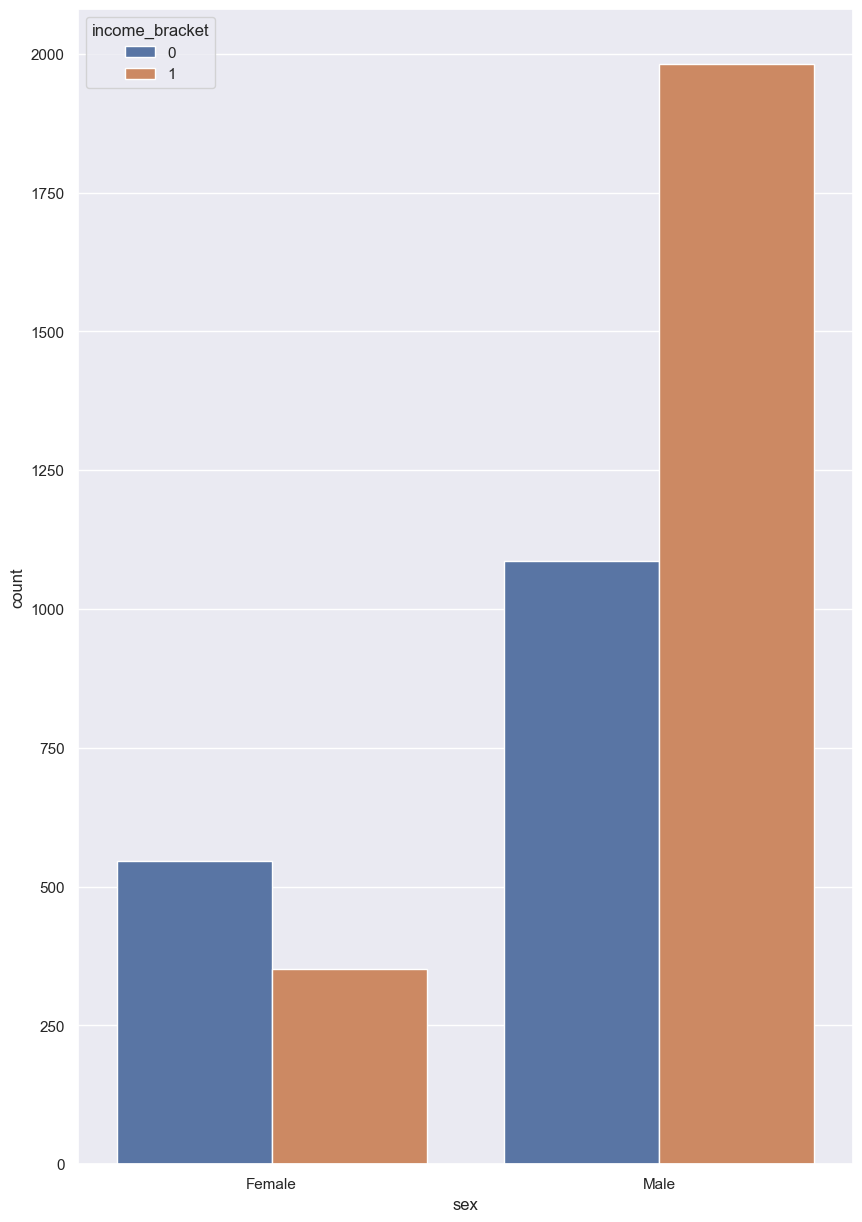

In [473]:
# Explore Sex vs Income
sns.countplot(x="sex",hue="income_bracket",data=df)
plt.show()

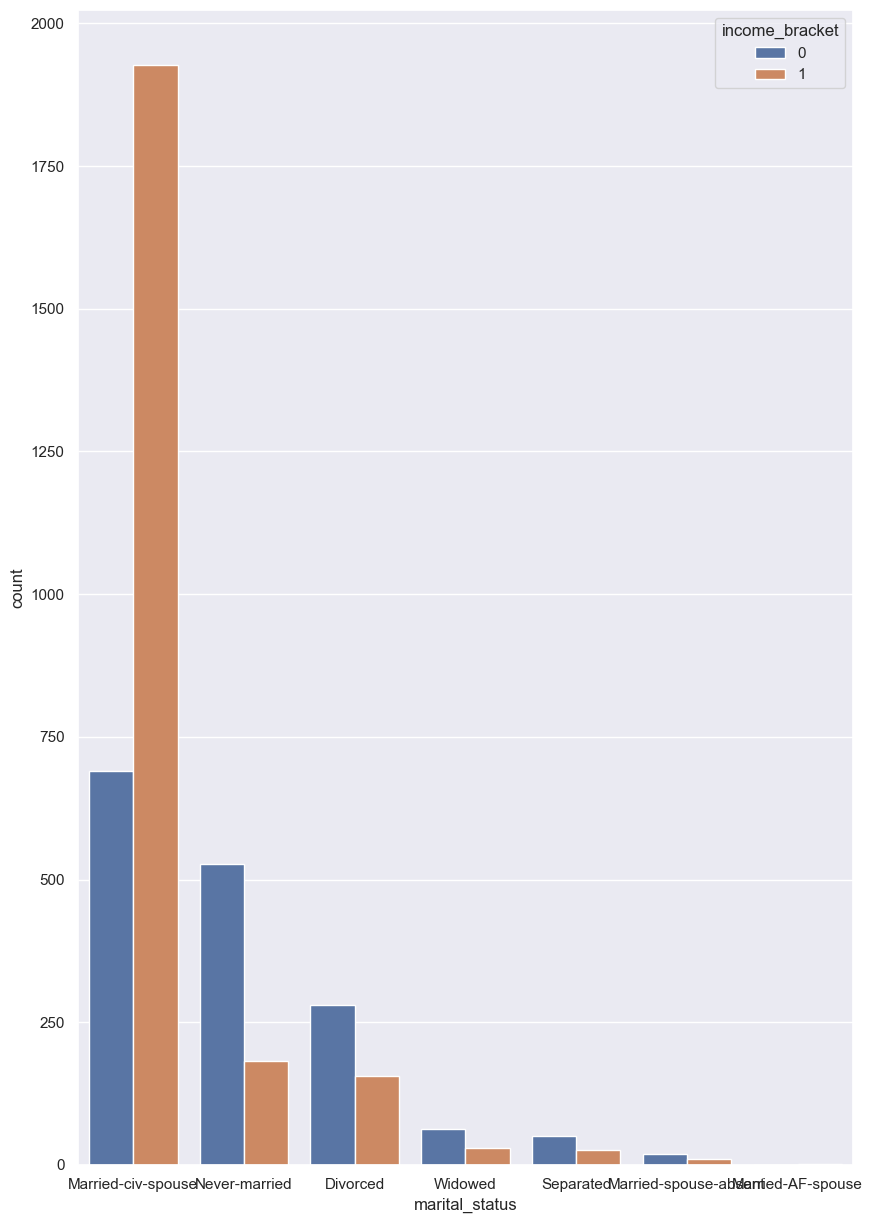

In [474]:
fig, ax = figsize=(10,6)
sns.countplot(data=df, x='marital_status', hue='income_bracket')
plt.rcParams["figure.figsize"] = (10,15)
plt.show()

In [475]:
df.groupby(['marital_status' ,'income_bracket'])['income_bracket'].count()

marital_status         income_bracket
Divorced               0                  281
                       1                  155
Married-AF-spouse      1                    1
Married-civ-spouse     0                  690
                       1                 1927
Married-spouse-absent  0                   20
                       1                   10
Never-married          0                  528
                       1                  183
Separated              0                   51
                       1                   26
Widowed                0                   63
                       1                   30
Name: income_bracket, dtype: int64

In [476]:
df.isna().sum()

age               0
workclass         0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income_bracket    0
dtype: int64

In [477]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3965 entries, 0 to 30723
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             3965 non-null   Int64 
 1   workclass       3965 non-null   object
 2   education       3965 non-null   object
 3   education_num   3965 non-null   Int64 
 4   marital_status  3965 non-null   object
 5   occupation      3965 non-null   object
 6   relationship    3965 non-null   object
 7   race            3965 non-null   object
 8   sex             3965 non-null   object
 9   capital_gain    3965 non-null   Int64 
 10  capital_loss    3965 non-null   Int64 
 11  hours_per_week  3965 non-null   Int64 
 12  native_country  3965 non-null   object
 13  income_bracket  3965 non-null   int64 
dtypes: Int64(5), int64(1), object(8)
memory usage: 484.0+ KB


In [478]:
df.describe()

,age,education_num,capital_gain,capital_loss,hours_per_week,income_bracket
count,3965.000000,3965.000000,3965.000000,3965.000000,3965.000000,3965.000000
mean,42.837327,11.065069,8306.971248,672.254981,43.843632,0.588146
std,12.568842,2.645809,18905.537361,922.542314,11.818603,0.492231
min,17.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,34.000000,9.000000,0.000000,0.000000,40.000000,0.000000
50%,42.000000,10.000000,3325.000000,0.000000,40.000000,1.000000
75%,51.000000,13.000000,7688.000000,1740.000000,50.000000,1.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [479]:
df.nunique()

age                68
workclass           7
education          16
education_num      16
marital_status      7
occupation         14
relationship        6
race                5
sex                 2
capital_gain      118
capital_loss       90
hours_per_week     74
native_country     38
income_bracket      2
dtype: int64

C:\Users\MSI GAMING\AppData\Roaming\Python\Python39\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\MSI GAMING\AppData\Roaming\Python\Python39\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args,

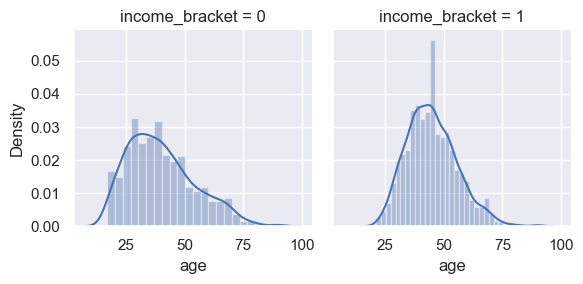

In [480]:
# Explore Age vs Income
g = sns.FacetGrid(df, col='income_bracket')
g = g.map(sns.distplot, "age")
plt.show()

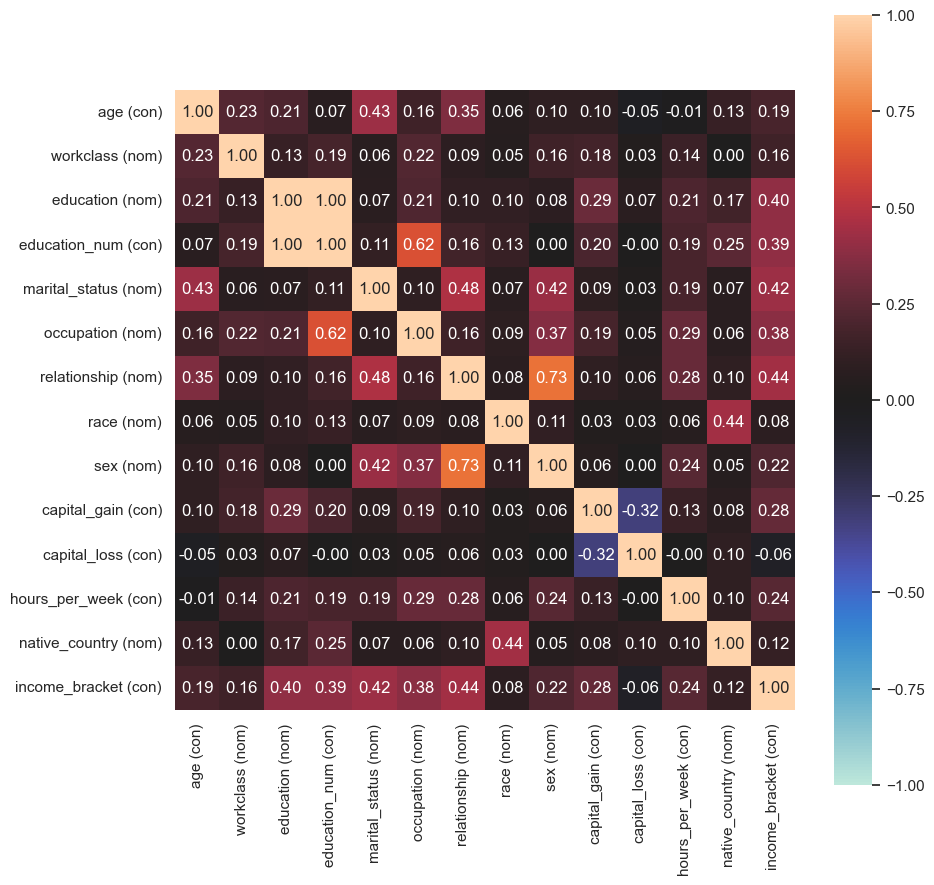

In [481]:
complete_correlation= associations(df, filename= 'complete_correlation.png', figsize=(10,10), mark_columns=True)

In [482]:
df.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,39,Private,9th,5,Married-civ-spouse,Other-service,Wife,Black,Female,3411,0,34,United-States,0
12,70,Private,9th,5,Married-civ-spouse,Machine-op-inspct,Wife,White,Female,2653,0,40,United-States,0
19,45,Private,9th,5,Married-civ-spouse,Adm-clerical,Husband,Black,Male,5178,0,40,United-States,1
28,58,Private,9th,5,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,3781,0,40,United-States,0
41,45,Private,9th,5,Married-civ-spouse,Other-service,Husband,White,Male,0,1848,40,United-States,1


In [483]:
# temp = df[['age', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week', 'income_bracket']]
# plt.figure(figsize=(20, 10))
# sns.set(font_scale=1.0)
# sns.pairplot(temp, hue='income_bracket', palette="deep") 
# plt.show()


In [484]:
df.describe(include='O')

,workclass,education,marital_status,occupation,relationship,race,sex,native_country
count,3965,3965,3965,3965,3965,3965,3965,3965
unique,7,16,7,14,6,5,2,38
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States
freq,2663,1021,2617,829,2331,3547,3067,3688


## 6. Feature Engineering

In [485]:
X = df.drop(['income_bracket'], axis=1)
y = df[['income_bracket']]

In [486]:
for col in X:
    p = X[col].sort_values().unique()

    print(col)
    print()
    print(p)
    print('-'*40)

age

<IntegerArray>
[17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54,
 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73,
 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 90]
Length: 68, dtype: Int64
----------------------------------------
workclass

['Federal-gov' 'Local-gov' 'Private' 'Self-emp-inc' 'Self-emp-not-inc'
 'State-gov' 'Without-pay']
----------------------------------------
education

['10th' '11th' '12th' '1st-4th' '5th-6th' '7th-8th' '9th' 'Assoc-acdm'
 'Assoc-voc' 'Bachelors' 'Doctorate' 'HS-grad' 'Masters' 'Preschool'
 'Prof-school' 'Some-college']
----------------------------------------
education_num

<IntegerArray>
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
Length: 16, dtype: Int64
----------------------------------------
marital_status

['Divorced' 'Married-AF-spouse' 'Married-civ-spouse'
 'Married-spouse-absent' 'Never-married' 'S

### Cardinality on Age

I will evide age based on certain category:
 * <= 19 is teenager
 * 20-30 is young adult
 * 31-45 is adult
 * 46-65 is middle age
 * `>` 65 is old people

In [487]:
# create age_group for X
X['age_group'] = ''

# assign category accordingly for X_train
X.loc[X['age'] <= 19, 'age_group'] = 'teenager'
X.loc[(X['age'] > 19) & (X['age'] <= 30), 'age_group'] = 'young adult'
X.loc[(X['age'] > 30) & (X['age'] <= 45), 'age_group'] = 'adult'
X.loc[(X['age'] > 45) & (X['age'] <= 65), 'age_group'] = 'middle age'
X.loc[X['age'] > 65, 'age_group'] = 'old people'

# drop column age
X = X.drop(['age'], axis=1)

### Cardinality on native country

I will group based on continent

In [488]:
# Create a new column to store the region for X
X['region'] = ''

# Set the region for each country for X_train
X.loc[X['native_country'].isin(['Cambodia', 'Japan', 'China', 'Hong', 'India', 'Iran', 'Laos', 'Philippines', 'Taiwan', 'Vietnam']), 'region'] = 'Asia'
X.loc[X['native_country'].isin(['England', 'France', 'Germany', 'Greece', 'Holand-Netherlands', 'Hungary', 'Ireland', 'Italy', 'Poland', 'Portugal', 'Yugoslavia']), 'region'] = 'Europe'
X.loc[X['native_country'].isin(['Columbia', 'Cuba', 'Dominican-Republic','Ecuador', 'El-Salvador','Guatemala','Haiti','Honduras','Mexico', 'Nicaragua', 'Peru','Puerto-Rico', 'South','Trinadad&Tobago', 'United-States','Jamaica', 'Canada']), 'region'] = 'North America'

# drop column native country
X = X.drop(['native_country'], axis=1)

### Split Num and Cat Col

## Split Test-set and Train-set

In [489]:
# Split Test-set and Train-set
# Since the 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y )
print('Train Size: ', X_train.shape)
print('Test Size: ', X_test.shape)
print(' ')
print('Train Size: ', y_train.shape)
print('Test Size: ', y_test.shape)

Train Size:  (3172, 13)
Test Size:  (793, 13)
 
Train Size:  (3172, 1)
Test Size:  (793, 1)


In [490]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3965 entries, 0 to 30723
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   workclass       3965 non-null   object
 1   education       3965 non-null   object
 2   education_num   3965 non-null   Int64 
 3   marital_status  3965 non-null   object
 4   occupation      3965 non-null   object
 5   relationship    3965 non-null   object
 6   race            3965 non-null   object
 7   sex             3965 non-null   object
 8   capital_gain    3965 non-null   Int64 
 9   capital_loss    3965 non-null   Int64 
 10  hours_per_week  3965 non-null   Int64 
 11  age_group       3965 non-null   object
 12  region          3965 non-null   object
dtypes: Int64(4), object(9)
memory usage: 449.2+ KB


In [491]:
# numerical column
num_cols = ['capital_gain', 'capital_loss', 'hours_per_week']

# categorical column
cat_cols = ['occupation', 'race', 'region', 'sex', 'workclass', 'relationship', 'marital_status']

# category ordinal
cat_ord_cols = ['education', 'education_num', 'age_group']

In [492]:
# Define Train-set and Test-set
# X-set for Numerical Column
X_train_num = X_train[num_cols]
X_test_num = X_test[num_cols]

# X-set for Categorical Column
X_train_cat = X_train[cat_cols]
X_test_cat = X_test[cat_cols]

# X-set for Categorical Ordinal Column
X_train_cat_ord = X_train[cat_ord_cols]
X_test_cat_ord = X_test[cat_ord_cols]

### Encoding Category Ordinal

In [493]:
# Feature encoding using OrdinalEncoder
encoder = OrdinalEncoder(categories=[['9th', '10th', '11th', '12th', '1st-4th', '5th-6th', '7th-8th',
       'HS-grad', 'Masters', 'Assoc-voc', 'Bachelors', 'Doctorate',
       'Preschool', 'Assoc-acdm', 'Prof-school', 'Some-college'], # col education
       [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], # col education_num
       ['adult', 'middle age', 'old people', 'teenager', 'young adult'], # col age_group
       ])

encoder.fit(X_train_cat_ord)
X_train_catold_encoded = encoder.transform(X_train_cat_ord)
X_test_catold_encoded = encoder.transform(X_test_cat_ord)

### Encoding Category 

In [494]:
ohe = OneHotEncoder(handle_unknown= 'ignore',sparse=False)
ohe.fit(X_train_cat)

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [495]:
# Assign to Train-set and Test-set
X_train_cat_encoded = ohe.transform(X_train_cat)
X_test_cat_encoded = ohe.transform(X_test_cat)

In [496]:
ohe.categories_

[array(['Adm-clerical', 'Armed-Forces', 'Craft-repair', 'Exec-managerial',
        'Farming-fishing', 'Handlers-cleaners', 'Machine-op-inspct',
        'Other-service', 'Priv-house-serv', 'Prof-specialty',
        'Protective-serv', 'Sales', 'Tech-support', 'Transport-moving'],
       dtype=object),
 array(['Amer-Indian-Eskimo', 'Asian-Pac-Islander', 'Black', 'Other',
        'White'], dtype=object),
 array(['Asia', 'Europe', 'North America'], dtype=object),
 array(['Female', 'Male'], dtype=object),
 array(['Federal-gov', 'Local-gov', 'Private', 'Self-emp-inc',
        'Self-emp-not-inc', 'State-gov', 'Without-pay'], dtype=object),
 array(['Husband', 'Not-in-family', 'Other-relative', 'Own-child',
        'Unmarried', 'Wife'], dtype=object),
 array(['Divorced', 'Married-AF-spouse', 'Married-civ-spouse',
        'Married-spouse-absent', 'Never-married', 'Separated', 'Widowed'],
       dtype=object)]

In [497]:
# Concatenate all arrays into a single 1D array
features_label = np.concatenate(ohe.categories_).tolist()

print(features_label)


['Adm-clerical', 'Armed-Forces', 'Craft-repair', 'Exec-managerial', 'Farming-fishing', 'Handlers-cleaners', 'Machine-op-inspct', 'Other-service', 'Priv-house-serv', 'Prof-specialty', 'Protective-serv', 'Sales', 'Tech-support', 'Transport-moving', 'Amer-Indian-Eskimo', 'Asian-Pac-Islander', 'Black', 'Other', 'White', 'Asia', 'Europe', 'North America', 'Female', 'Male', 'Federal-gov', 'Local-gov', 'Private', 'Self-emp-inc', 'Self-emp-not-inc', 'State-gov', 'Without-pay', 'Husband', 'Not-in-family', 'Other-relative', 'Own-child', 'Unmarried', 'Wife', 'Divorced', 'Married-AF-spouse', 'Married-civ-spouse', 'Married-spouse-absent', 'Never-married', 'Separated', 'Widowed']


### Scalled Numerical Column

In [498]:
# Define Test-set and Train-set for Numerical Column
X_train_num = X_train[num_cols]
X_test_num = X_test[num_cols]

In [499]:
# Feature Scalling using MniMaxScaller
scaler = MinMaxScaler()
scaler.fit(X_train_num)

X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

### Joined All Encoded and Scalling

In [500]:
# Join array for scaled and encoded features
X_train_final = np.concatenate([X_train_num_scaled, X_train_cat_encoded, X_train_catold_encoded], axis=1)
X_test_final = np.concatenate([X_test_num_scaled, X_test_cat_encoded, X_test_catold_encoded], axis=1)

# Create dataframe for all joined array
X_train_final_df = pd.DataFrame(X_train_final, columns = [num_cols + features_label + cat_ord_cols])
X_train_final_df.head()

,capital_gain,capital_loss,hours_per_week,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,...,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed,education,education_num,age_group
0,0.051781,0.0,0.602041,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,10.0,12.0,1.0
1,0.051781,0.0,0.602041,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,15.0,9.0,0.0
2,0.150242,0.0,0.551020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,14.0,14.0,0.0
3,0.021050,0.0,0.397959,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,7.0,8.0,0.0
4,0.031030,0.0,0.397959,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,15.0,9.0,1.0


## 7. Model Definition

In [501]:
# Create the logistic regression model
logreg = LogisticRegression(max_iter=1000)

# Create the SVM model
svc_linear = SVC(kernel='linear', gamma="auto", C= 1)


## 8. Model Training

In [502]:
# Train the model on the training data
logreg.fit(X_train_final, y_train)
y_pred_logreg = logreg.predict(X_test_final)


# Train the model on the training data
svc_linear.fit(X_train_final, y_train)# Make prediction
y_pred_linear = svc_linear.predict(X_test_final)# Evaluate our model


c:\Users\MSI GAMING\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\MSI GAMING\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## 9. Model Evaluation

In [503]:
# Linear Logistic Regression
print('Evaluation: Linear Logistic Regression')
print('Training score: {:.4f}'.format(logreg.score(X_train_final, y_train)))
print('Test score: {:.4f}'.format(logreg.score(X_test_final, y_test)))

print(classification_report(y_test, y_pred_logreg))

Evaluation: Linear Logistic Regression
Training score: 0.8159
Test score: 0.8197
              precision    recall  f1-score   support

           0       0.80      0.75      0.77       327
           1       0.83      0.87      0.85       466

    accuracy                           0.82       793
   macro avg       0.82      0.81      0.81       793
weighted avg       0.82      0.82      0.82       793



In [504]:
# SVC Linear Kernel
print("Evaluation: Linear kernel")
print('Training score: {:.4f}'.format(svc_linear.score(X_train_final, y_train)))
print('Test score: {:.4f}'.format(svc_linear.score(X_test_final, y_test)))

print(classification_report(y_test,y_pred_linear))

Evaluation: Linear kernel
Training score: 0.8335
Test score: 0.8285
              precision    recall  f1-score   support

           0       0.84      0.72      0.77       327
           1       0.82      0.91      0.86       466

    accuracy                           0.83       793
   macro avg       0.83      0.81      0.82       793
weighted avg       0.83      0.83      0.83       793



<Axes: title={'center': 'Logistic Regression'}>

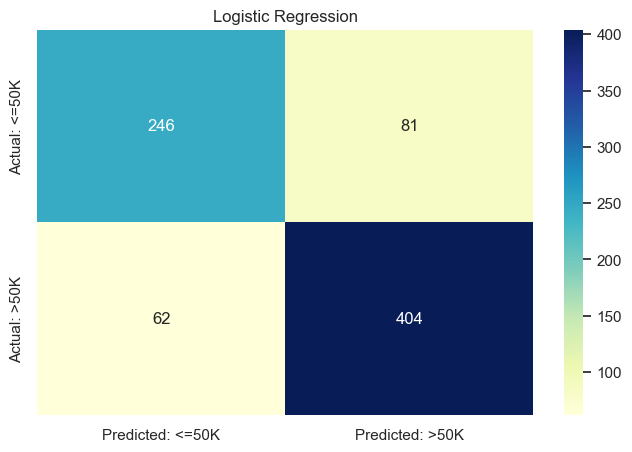

In [505]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred_logreg)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted: <=50K','Predicted: >50K'],index=['Actual: <=50K','Actual: >50K'])
plt.figure(figsize = (8,5))
plt.title('Logistic Regression')
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

<Axes: title={'center': 'SVM'}>

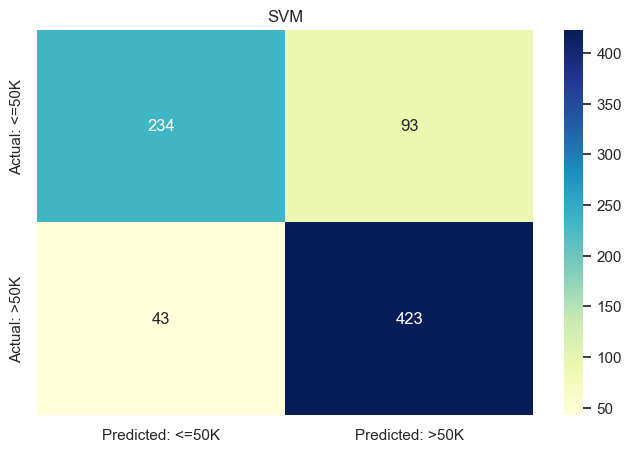

In [506]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred_linear)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted: <=50K','Predicted: >50K'],index=['Actual: <=50K','Actual: >50K'])
plt.figure(figsize = (8,5))
plt.title('SVM')
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

## 10. Model Saving

In [507]:
with open('model_log_reg.pkl', 'wb') as file_1:
    pickle.dump(logreg, file_1)

with open('svc_linear.pkl', 'wb') as file_2:
    pickle.dump(svc_linear, file_2)

with open('model_scaler.pkl', 'wb') as file_3:
    pickle.dump(scaler, file_3)

with open('model_encoder_ord.pkl', 'wb') as file_4:
    pickle.dump(encoder, file_4)

with open("model_encoder.pkl", "wb") as file_5: 
    pickle.dump(ohe, file_5)

with open('list_num_cols.txt', 'w') as file_6:
    json.dump(num_cols, file_6)

with open('list_cat_cols.txt', 'w') as file_7:
    json.dump(cat_cols, file_7)

with open('list_cat_cols_ord.txt', 'w') as file_8:
    json.dump(cat_ord_cols, file_8)